In [38]:
%matplotlib inline  
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors.kde import KernelDensity
from scipy.stats.distributions import norm
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

import matplotlib.pyplot as plt
import arff
import pandas as pd
import numpy as np
import time

In [39]:
dataset = arff.load(open('data/atom.arff', 'r'))

In [40]:
dataset['attributes']

[('x', 'REAL'), ('y', 'REAL'), ('z', 'REAL'), ('class', ['1', '2'])]

In [41]:
attributes = [a[0] for a in dataset['attributes']]

In [42]:
df = pd.DataFrame(dataset['data'], columns=attributes)

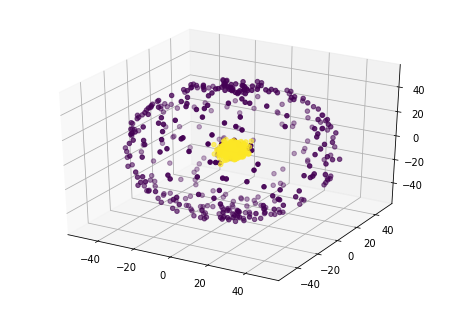

In [43]:
fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(df['x'], df['y'], df['z'], c=df['class'])
pyplot.show()

In [44]:
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html
words = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
for word in words:
    db = DBSCAN(eps=10, min_samples=10, metric=word, p=2).fit(df)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(df['class'], labels))
    print("Completeness: %0.3f" % metrics.completeness_score(df['class'], labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(df['class'], labels))
    print("Adjusted Rand Index: %0.3f"
          % metrics.adjusted_rand_score(df['class'], labels))
    print("Adjusted Mutual Information: %0.3f"
          % metrics.adjusted_mutual_info_score(df['class'], labels))


Estimated number of clusters: 3
Homogeneity: 1.000
Completeness: 0.659
V-measure: 0.794
Adjusted Rand Index: 0.803
Adjusted Mutual Information: 0.658
Estimated number of clusters: 3
Homogeneity: 1.000
Completeness: 0.704
V-measure: 0.826
Adjusted Rand Index: 0.848
Adjusted Mutual Information: 0.703
Estimated number of clusters: 9
Homogeneity: 1.000
Completeness: 0.461
V-measure: 0.631
Adjusted Rand Index: 0.641
Adjusted Mutual Information: 0.459
Estimated number of clusters: 3
Homogeneity: 1.000
Completeness: 0.659
V-measure: 0.794
Adjusted Rand Index: 0.803
Adjusted Mutual Information: 0.658


In [47]:
for n_clusters in (30, 3):
    plt.figure(figsize=(10, 4))
    for index, linkage in enumerate(('average', 'complete', 'ward')):
        model = AgglomerativeClustering(linkage=linkage,
                                        connectivity=None,
                                        n_clusters=n_clusters)
        model.fit(df)
        core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
        labels = model.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        print('Estimated number of clusters: %d' % n_clusters_)
        print("Homogeneity: %0.3f" % metrics.homogeneity_score(df['class'], labels))

Estimated number of clusters: 30
Homogeneity: 1.000
Estimated number of clusters: 30
Homogeneity: 1.000
Estimated number of clusters: 30
Homogeneity: 1.000
Estimated number of clusters: 3
Homogeneity: 0.240
Estimated number of clusters: 3
Homogeneity: 0.286
Estimated number of clusters: 3
Homogeneity: 0.440


In [16]:
x_grid = np.linspace(-4.5, 3.5, 2)

# Draw points from a bimodal distribution in 1D
np.random.seed(0)
x = np.concatenate([norm(-1, 1.).rvs(400),
                    norm(1, 0.3).rvs(100)])
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)
log_pdf = kde.score_samples(x)
pdf = np.exp(log_pdf)
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='test')


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: query data dimension must match training data dimension